Linear regression for pumpkins dataset

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pumpkins=pd.read_csv('../data/US-pumpkins.csv')

#filter out any rows that don't use price per bushel
pumpkins=pumpkins[pumpkins['Package'].str.contains('bushel',case=True,regex=True)]
pumpkins.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [ ]:
#missing data in each column
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [6]:
#new columns we want to keep
new_columns=['Package', 'Low Price', 'High Price', 'Date']

#drop other columns
# pumpkins=pumpkins.drop([c for c in pumpkins.columns if c not in new_columns],axis=1)
pumpkins = pumpkins.loc[:, new_columns]
# using the loc function which extracts from the original dataframe a group of rows (passed as first parameter) and columns (passed as second parameter). The expression : in the case below means "all rows".

In [7]:
#calculate av price
price=(pumpkins['Low Price']+pumpkins['High Price'])/2

#extract the month
month=pd.DatetimeIndex(pumpkins['Date']).month
# pumpkins['month'] = pd.to_datetime(pumpkins['date']).dt.month

In [8]:
#new dataframe
new_pumpkins = pd.DataFrame({'Month':month,'Package':pumpkins['Package'],'Low Price':pumpkins['Low Price'],'High Price': pumpkins['High Price'],'Price': price})
new_pumpkins

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.00,15.0,15.000
71,9,1 1/9 bushel cartons,18.00,18.0,18.000
72,10,1 1/9 bushel cartons,18.00,18.0,18.000
73,10,1 1/9 bushel cartons,17.00,17.0,17.000
74,10,1 1/9 bushel cartons,15.00,15.0,15.000
...,...,...,...,...,...
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000


If you look at the Package column, pumpkins are sold in many different configurations. Some are sold in '1 1/9 bushel' measures, and some in '1/2 bushel' measures, some per pumpkin, some per pound, and some in big boxes with varying widths.

In [11]:
#convert the price of all cell prices by 1 1/9 by dividing 1 1/9
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'),'Price']=(price/(1+1/9)).round(1)
#convert the price of all cell prices by 1/2 by dividing 1/2
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'),'Price']=(price/(1/2)).round(1)

In [12]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,13.5
71,9,1 1/9 bushel cartons,18.0,18.0,16.2
72,10,1 1/9 bushel cartons,18.0,18.0,16.2
73,10,1 1/9 bushel cartons,17.0,17.0,15.3
74,10,1 1/9 bushel cartons,15.0,15.0,13.5


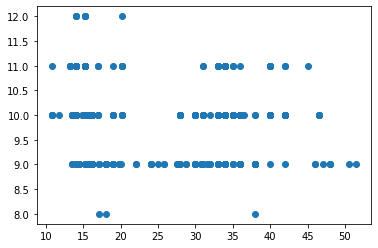

In [ ]:
#values we want to plot
price = new_pumpkins['Price']
month = new_pumpkins['Month']
plt.scatter(price, month)
plt.show()

# It's not particularly useful as all it does is display in your data as a spread of points in a given month.

Text(0, 0.5, 'Pumpkin price')

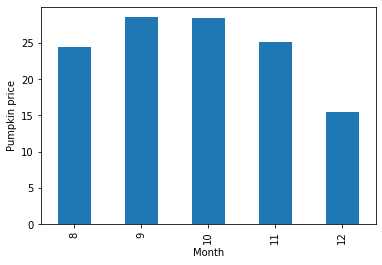

In [ ]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
# group the data by month, get the av price within each month and plot the data using bar chart
plt.ylabel('Pumpkin price')
# This is a more useful data visualization! It seems to indicate that the highest price for pumpkins occurs in September and October.